# SPOTIFY MOST STREAM SONG


# Introduction


 Import libs 

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import seaborn as sns
import plotly.express as px
import warnings
import seaborn as sns

# Data Preparation and Enrichment

### BIG CHECK

In [3]:
# Load the data
df=pd.read_csv('CLEANED_featured_Spotify_artist_info.csv')
df.head()

,dates,ids,names,monthly_listeners,popularity,followers,genres,first_release,last_release,num_releases,num_tracks,playlists_found,feat_track_ids
0,2024-04-01,01XYiBYaoMJcNhPokrg0l0,stayc,3049521.0,63,1782552,"k-pop, k-pop girl group",2020,2024,14,2,K-Pop ON! (온),0y0uzuB1HxljAY2j0tLETp
1,2024-04-01,099toTcKJoywTosZr2hHjy,langhorne slim,1060777.0,51,163686,"anti-folk, indie folk, modern folk rock, new a...",2008,2023,20,3,Sunrise Run,40rjypnguxfhPy4Bbv5SWc
2,2024-04-01,0BvkDsjIUla7X0k6CSWh1I,luke bryan,10460890.0,76,8487512,"contemporary country, country, country road, m...",2007,2023,20,6,Sunrise Run,386DfI5sZ0eJi1i6SZVqLw
3,2024-04-01,0CmvFWTX9zmMNCUi6fHtAx,the boyz,1285501.0,60,2845229,"k-pop, k-pop boy group",2020,2024,20,6,K-Pop ON! (온),6MEtGumgTXWquxH35osvEC
4,2024-04-01,0FRUZvZNPzM3YJMABJxf2K,wendy,1885379.0,62,907553,"k-pop, korean pop",2015,2024,20,2,K-Pop ON! (온),7b8SkcdeiTuo6FQXdPgPWW


DATA TYPES


In [4]:
df.dtypes

dates                 object
ids                   object
names                 object
monthly_listeners    float64
popularity             int64
followers              int64
genres                object
first_release          int64
last_release           int64
num_releases           int64
num_tracks             int64
playlists_found       object
feat_track_ids        object
dtype: object

Check dupicates

In [5]:
df.duplicated().sum()

0

Count & Vizualisation

In [6]:
df.describe()

,monthly_listeners,popularity,followers,first_release,last_release,num_releases,num_tracks
count,2.025100e+04,20251.000000,2.025100e+04,20251.000000,20251.000000,20251.000000,20251.000000
mean,7.036190e+06,53.459039,2.853238e+06,2012.787072,2023.339786,16.834527,2.639376
std,1.377954e+07,17.828052,9.206670e+06,43.596561,1.949979,5.133740,4.173280
min,0.000000e+00,0.000000,0.000000e+00,0.000000,1972.000000,1.000000,1.000000
25%,2.157725e+05,40.000000,1.595300e+04,2011.000000,2023.000000,14.000000,1.000000
50%,1.121669e+06,53.000000,1.634480e+05,2017.000000,2024.000000,20.000000,1.000000
75%,6.926014e+06,67.000000,1.371360e+06,2020.000000,2024.000000,20.000000,2.000000
max,1.140272e+08,100.000000,1.137957e+08,2024.000000,2024.000000,20.000000,101.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20251 entries, 0 to 20250
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dates              20251 non-null  object 
 1   ids                20251 non-null  object 
 2   names              20251 non-null  object 
 3   monthly_listeners  20251 non-null  float64
 4   popularity         20251 non-null  int64  
 5   followers          20251 non-null  int64  
 6   genres             20251 non-null  object 
 7   first_release      20251 non-null  int64  
 8   last_release       20251 non-null  int64  
 9   num_releases       20251 non-null  int64  
 10  num_tracks         20251 non-null  int64  
 11  playlists_found    20251 non-null  object 
 12  feat_track_ids     20251 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.0+ MB


### MISSING VALUES

In [8]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


In [9]:
# Drop rows with any missing values
"""
This script performs data cleaning on a DataFrame by dropping rows and columns with any missing values.

Functions:
- Drop rows with any missing values.
- Drop columns with any missing values.

Variables:
- df_cleaned: DataFrame after dropping rows and columns with missing values.
"""
df_cleaned = df.dropna()

# Drop columns with any missing values
df_cleaned = df.dropna(axis=1)

### DATA CLEANER

Methods : Z-score, Interquartile Range (IQR), quantiles, Density-Based Spatial Clustering, Isolation Forest, Local Outlier Factor

In [10]:
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers based on a Z-score threshold of 4
df_outliers = df[(z_scores > 4).any(axis=1) | (z_scores < -4).any(axis=1)]
print(f'Number of outliers detected: {df_outliers.shape[0]}')

Number of outliers detected: 807


#### Identification des valeurs aberrantes avec un seuil de Z-score 


In [11]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 4).all(axis=1) & (z_scores > -4).all(axis=1)]

Enfin, cette expression extrait toutes les lignes du DataFrame df qui contiennent au moins une valeur aberrante. Le DataFrame résultant (df_outliers) contient uniquement les lignes avec des valeurs anormales.

# Machine Learning

## Linear & Polynomial Regressions

Erreur quadratique moyenne de la régression linéaire: 138.12738466029265
Score R2 de la régression linéaire: 0.5487209244500606
Erreur quadratique moyenne de la régression polynomiale: 94.93183603320362
Score R2 de la régression polynomiale: 0.6898460699108715


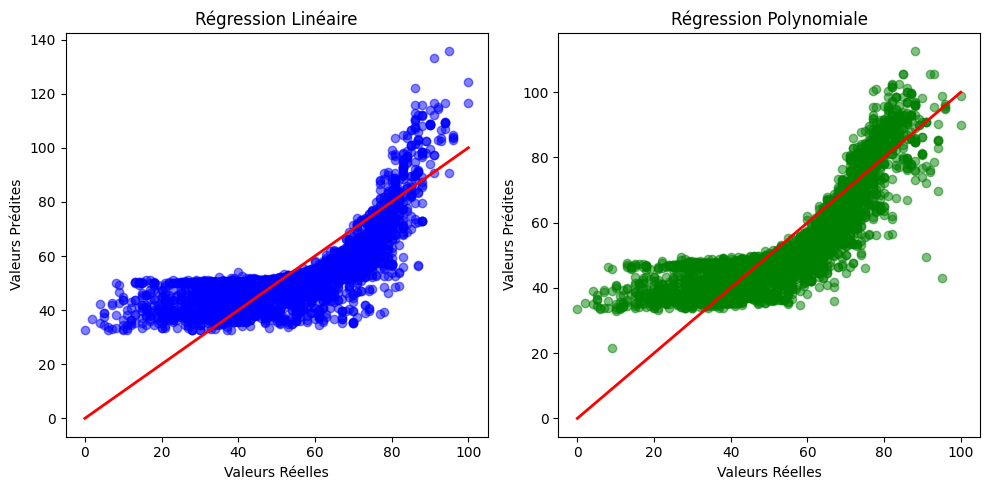

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Charger votre dataset (remplacer 'your_data.csv' par le chemin réel du fichier)
df = pd.read_csv('CLEANED_featured_Spotify_artist_info.csv')

# S'assurer que toutes les colonnes de caractéristiques sont numériques
X = df[['monthly_listeners', 'followers', 'first_release',
       'last_release', 'num_releases', 'num_tracks']].apply(pd.to_numeric, errors='coerce')


# Convertir la colonne 'streams' en numérique
y = pd.to_numeric(df['popularity'], errors='coerce')

# Supprimer les lignes contenant des valeurs NaN dans X et y
# Créer un DataFrame combiné pour supprimer les NaN de manière synchrone
data = pd.concat([X, y], axis=1)
data = data.dropna()

# Séparer les données nettoyées en X et y
X = data[['monthly_listeners', 'followers', 'first_release',
       'last_release', 'num_releases', 'num_tracks']]
y = data['popularity']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Régression polynomiale (degré=2 en exemple)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Modèle de régression polynomiale
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Évaluation des deux modèles
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Erreur quadratique moyenne de la régression linéaire:", mse_lin)
print("Score R2 de la régression linéaire:", r2_lin)
print("Erreur quadratique moyenne de la régression polynomiale:", mse_poly)
print("Score R2 de la régression polynomiale:", r2_poly)

# Visualisation
plt.figure(figsize=(10, 5))

# Tracer les résultats de la régression linéaire
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Régression Linéaire')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

# Tracer les résultats de la régression polynomiale
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Régression Polynomiale')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

plt.tight_layout()
plt.show()


Régression Linéaire - MSE: 138.1274, R2: 0.5487
Régression Polynomiale (degré 2) - MSE: 94.9318, R2: 0.6898


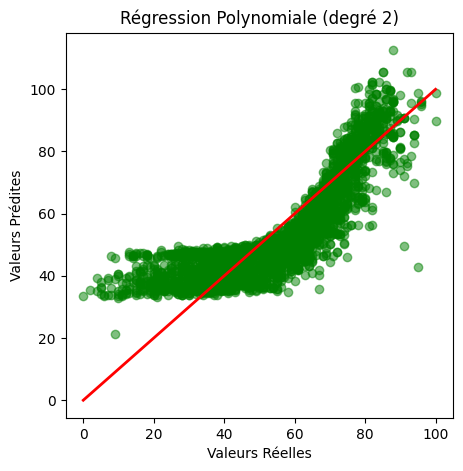

Régression Polynomiale (degré 3) - MSE: 73.3936, R2: 0.7602


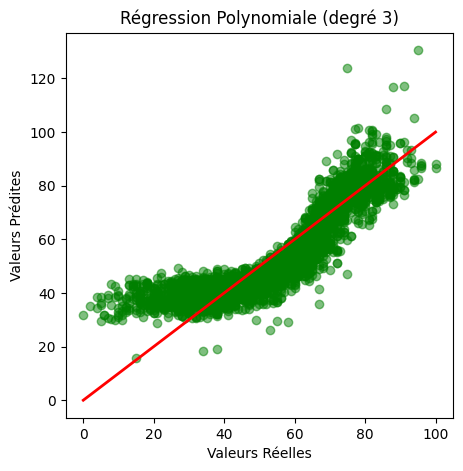

Régression Polynomiale (degré 4) - MSE: 66.6128, R2: 0.7824


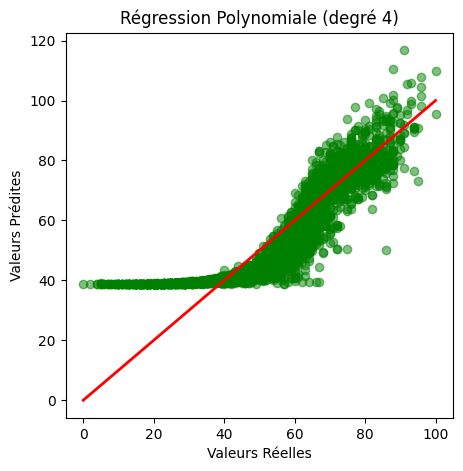

Régression Polynomiale (degré 5) - MSE: 318.9168, R2: -0.0419


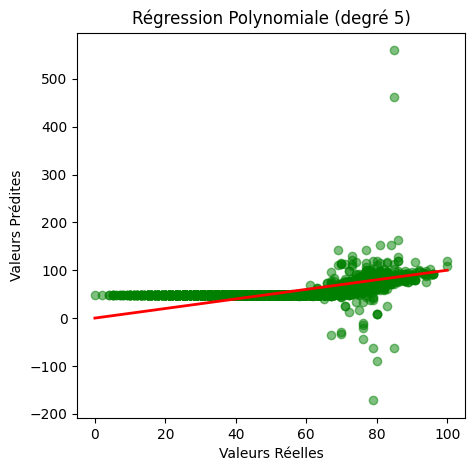

In [19]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Charger votre dataset (remplacer 'your_data.csv' par le chemin réel du fichier)
df = pd.read_csv('CLEANED_featured_Spotify_artist_info.csv')

# S'assurer que toutes les colonnes de caractéristiques sont numériques
X = df[['monthly_listeners', 'followers', 'first_release',
       'last_release', 'num_releases', 'num_tracks']].apply(pd.to_numeric, errors='coerce')

# Convertir la colonne 'streams' en numérique
y = pd.to_numeric(df['popularity'], errors='coerce')

# Supprimer les lignes contenant des valeurs NaN dans X et y
data = pd.concat([X, y], axis=1).dropna()

# Séparer les données nettoyées en X et y
X = data[['monthly_listeners', 'followers', 'first_release',
       'last_release', 'num_releases', 'num_tracks']]
y = data['popularity']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Régression linéaire de référence
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Régression Linéaire - MSE: {mse_lin:.4f}, R2: {r2_lin:.4f}")

# Tester plusieurs degrés de régression polynomiale
for degree in range(2, 6):  # Essayer des degrés de 2 à 5
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Ajuster le modèle de régression polynomiale
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    y_pred_poly = poly_reg.predict(X_test_poly)
    
    # Évaluer le modèle
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    print(f"Régression Polynomiale (degré {degree}) - MSE: {mse_poly:.4f}, R2: {r2_poly:.4f}")
    
    # Visualiser les résultats
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test, y_pred_poly, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f'Régression Polynomiale (degré {degree})')
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.show()


Régression Exponentielle Polynomiale (degré 2) - MSE: 168.4754, R2: 0.4721


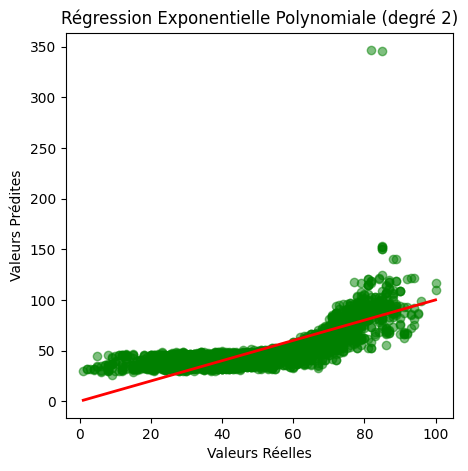

Régression Exponentielle Polynomiale (degré 3) - MSE: 26159515.1912, R2: -81967.6202


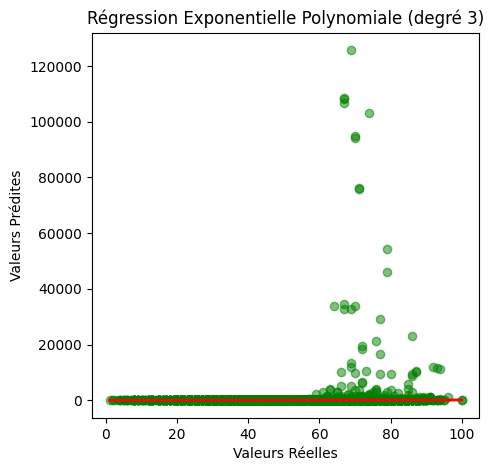

Régression Exponentielle Polynomiale (degré 4) - MSE: 71482336.7817, R2: -223982.8342


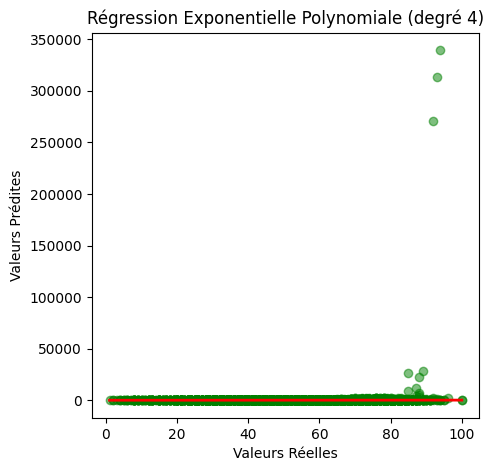

Régression Exponentielle Polynomiale (degré 5) - MSE: 105775.2696, R2: -330.4378


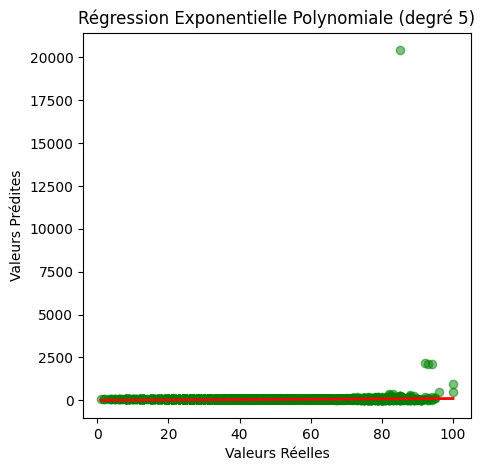

In [25]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Charger votre dataset (remplacer 'your_data.csv' par le chemin réel du fichier)
df = pd.read_csv('CLEANED_featured_Spotify_artist_info.csv')

# S'assurer que toutes les colonnes de caractéristiques sont numériques
X = df[['monthly_listeners', 'followers', 'first_release',
       'last_release', 'num_releases', 'num_tracks']].apply(pd.to_numeric, errors='coerce')

# Convertir la colonne 'popularity' en numérique
y = pd.to_numeric(df['popularity'], errors='coerce')

# Supprimer les lignes contenant des valeurs NaN dans X et y
data = pd.concat([X, y], axis=1).dropna()

# Séparer les données nettoyées en X et y
X = data[['monthly_listeners', 'followers', 'first_release',
       'last_release', 'num_releases', 'num_tracks']]
y = data['popularity']

# Filtrer les valeurs non-positives de y (valeurs ≤ 0)
positive_indices = y > 0
X = X[positive_indices]
y = y[positive_indices]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer une transformation logarithmique à y après filtrage
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Tester plusieurs degrés de régression exponentielle polynomiale
for degree in range(2, 6):  # Essayer des degrés de 2 à 5
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Ajuster le modèle de régression polynomiale sur les données log-transformées
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train_log)
    y_pred_log = poly_reg.predict(X_test_poly)
    y_pred_exp = np.exp(y_pred_log)  # Inverser la transformation logarithmique
    
    # Évaluer le modèle
    mse_poly = mean_squared_error(y_test, y_pred_exp)
    r2_poly = r2_score(y_test, y_pred_exp)
    
    print(f"Régression Exponentielle Polynomiale (degré {degree}) - MSE: {mse_poly:.4f}, R2: {r2_poly:.4f}")
    
    # Visualiser les résultats
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test, y_pred_exp, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f'Régression Exponentielle Polynomiale (degré {degree})')
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.show()


## Classifiers

### Correlation

Index(['monthly_listeners', 'popularity', 'followers', 'first_release',
       'last_release', 'num_releases', 'num_tracks'],
      dtype='object')


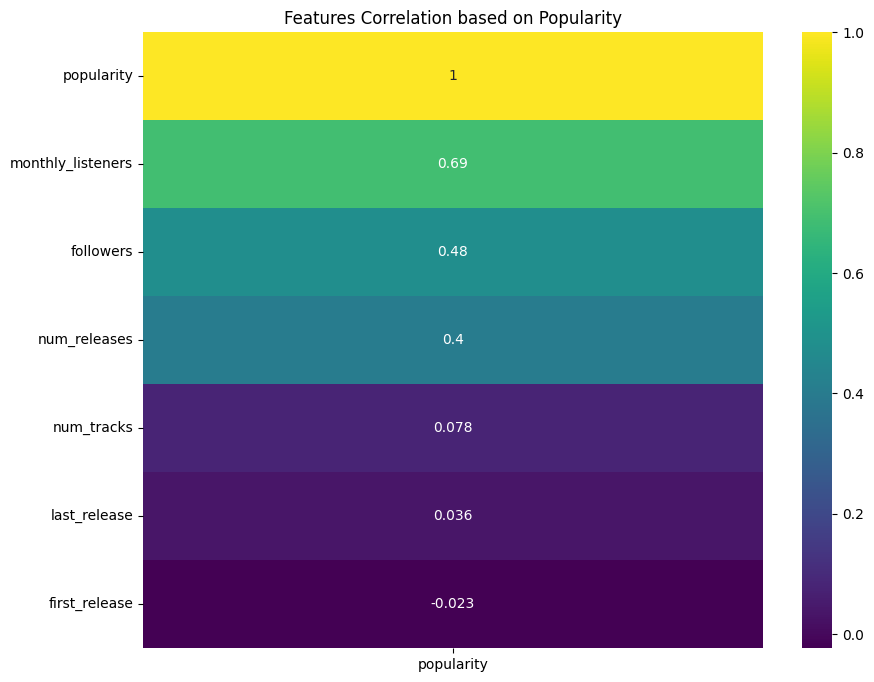

In [13]:
# Charger les données (supposons que le DataFrame est df)
df=pd.read_csv('CLEANED_featured_Spotify_artist_info.csv')

# Convertir la colonne 'streams' en type numérique
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

# Sélection des colonnes numériques pour l'analyse
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Check column names
print(numerical_df.columns)

# Ensure 'streams' column exists
if 'popularity' not in numerical_df.columns:
    raise KeyError("'Popularity' column not found in the DataFrame. Please check the column name.")

# Corrélation avec la target 'streams'
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr()[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='viridis')
plt.title('Features Correlation based on Popularity')
plt.show()

### K-MEANS

### Random Forest

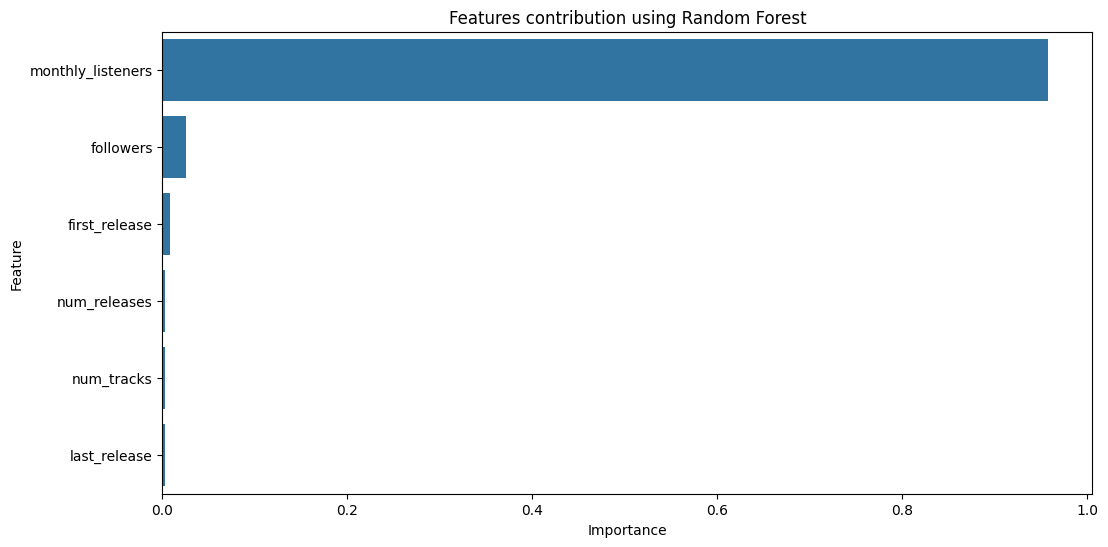

Les features les plus pertinentes selon RFE: Index(['monthly_listeners', 'followers', 'first_release', 'num_releases',
       'num_tracks'],
      dtype='object')


In [14]:
# Préparer les données pour l'entraînement (target: 'streams')
X = numerical_df.drop(columns=['popularity'])
y = numerical_df['popularity']

# Drop rows with NaN values in the target variable
X = X[y.notna()]
y = y.dropna()

# Utilisation de Random Forest pour déterminer l'importance des features
model = RandomForestRegressor(random_state=42, n_estimators=200)
model.fit(X, y)

# Importance des features
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher l'importance des features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Features contribution using Random Forest')
plt.show()

# Utilisation de la méthode RFE pour la sélection des features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

print(f'Les features les plus pertinentes selon RFE: {selected_features}')

### DECISION TREE

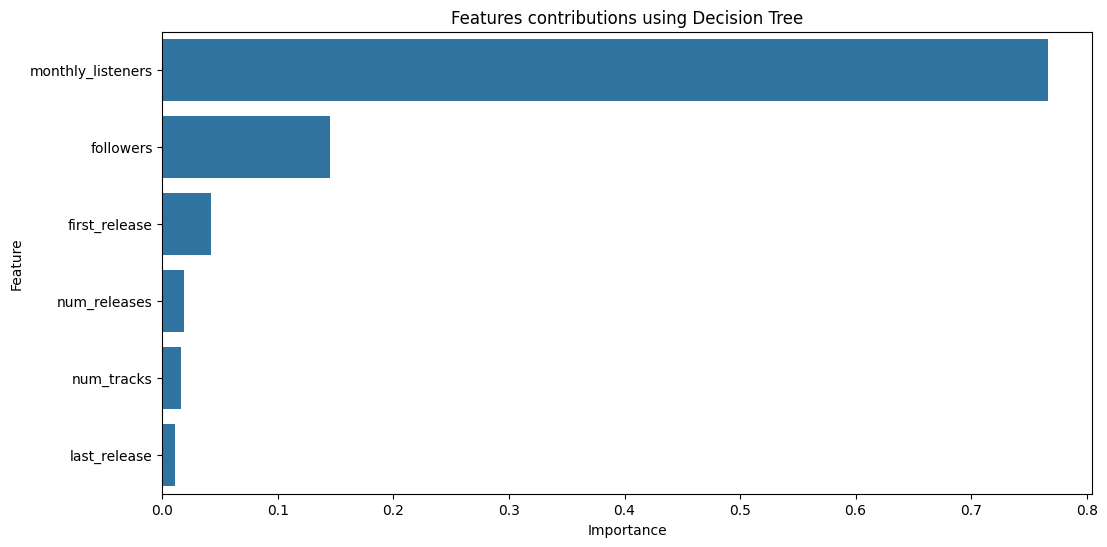

Les features les plus pertinentes selon RFE: Index(['monthly_listeners', 'followers', 'first_release', 'num_releases',
       'num_tracks'],
      dtype='object')


In [15]:
# Préparer les données pour l'entraînement (target: 'streams')
X = numerical_df.drop(columns=['popularity'])
y = numerical_df['popularity']

# Drop rows with NaN values in the target variable
X = X[y.notna()]
y = y.dropna()

# Convert continuous target variable to discrete classes
y_discrete = pd.qcut(y, q=4, labels=False)

# Utilisation de DecisionTreeClassifier pour déterminer l'importance des features
model = tree.DecisionTreeClassifier()
model.fit(X, y_discrete)

# Importance des features
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher l'importance des features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Features contributions using Decision Tree')
plt.show()

# Utilisation de la méthode RFE pour la sélection des features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y_discrete)
selected_features = X.columns[rfe.support_]

print(f'Les features les plus pertinentes selon RFE: {selected_features}')

# DEEP LEARNING 

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
print(tf.__version__)

2.17.0


## Neural Network

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Charger les données
data = pd.read_csv('CLEANED_featured_Spotify_artist_info.csv')  # Remplacer par le chemin vers vos données

# Afficher les types de données des colonnes
print(data.dtypes)

# Identifier les colonnes non numériques
non_numeric_columns = data.select_dtypes(include=['object']).columns
# Ensure 'streams' column exists before conversion
if 'popularity' in data.columns:
    data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
else:
    raise KeyError("'popularity' column not found in the DataFrame. Please check the column name.")

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définir l'architecture du modèle neuronal pour la régression
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Utiliser une activation linéaire pour la régression

# Compiler le modèle pour la régression
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Évaluer le modèle
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae:.2f}')

# Faire des prédictions
predictions = model.predict(X_test)

# Afficher l'erreur quadratique moyenne des prédictions
mse = mean_squared_error(y_test, predictions)
print(f'Erreur quadratique moyenne (MSE): {mse:.2f}')

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

dates                 object
ids                   object
names                 object
monthly_listeners    float64
popularity             int64
followers              int64
genres                object
first_release          int64
last_release           int64
num_releases           int64
num_tracks             int64
playlists_found       object
feat_track_ids        object
dtype: object
Epoch 1/50


c:\Users\Camille\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1296/1296 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1306.9921 - mae: 28.1633 - val_loss: 161.9868 - val_mae: 9.8845
Epoch 2/50
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 145.1386 - mae: 9.2208 - val_loss: 94.1080 - val_mae: 7.3265
Epoch 3/50
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 76.9698 - mae: 6.5208 - val_loss: 63.8496 - val_mae: 5.6839
Epoch 4/50
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 56.2344 - mae: 5.3396 - val_loss: 49.3554 - val_mae: 5.0502
Epoch 5/50
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 44.0900 - mae: 4.7110 - val_loss: 45.7547 - val_mae: 5.1464
Epoch 6/50
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 39.7264 - mae: 4.4023 - val_loss: 37.4062 - val_mae: 4.2246
Epoch 7/50
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 33.8670 - mae: 4.0800 - val_loss: 32.7181 - val_mae: 4.0815
Epoch 8/50
1296/1296 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32.8138 - mae: 3.9862 - val_loss: 32.4120 - val_mae: 3.8272
Epoch 9/50
1296/1296 ━━━━━━━━━

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Charger les données
data = pd.read_csv('CLEANED_featured_Spotify_artist_info.csv')

# Convertir la colonne 'streams' en numérique
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

# Appliquer une transformation logarithmique sur 'streams'
data['popularity'] = np.log1p(data['popularity'])

# Encodage des colonnes non numériques en utilisant get_dummies
non_numeric_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=non_numeric_columns)

# Supprimer les lignes avec des valeurs manquantes dans la colonne 'streams'
data = data.dropna(subset=['popularity'])

# Séparer les caractéristiques (X) et la cible (y)
X = data.drop(columns=['popularity'])
y = data['popularity']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définir l'architecture du modèle neuronal avec régularisation L2 et EarlyStopping
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Configurer le EarlyStopping pour éviter le surajustement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraîner le modèle avec validation et EarlyStopping
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.3, callbacks=[early_stopping])

# Évaluer le modèle
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae:.2f}')

# Faire des prédictions
predictions = model.predict(X_test)

# Appliquer la transformation inverse pour revenir à l'échelle d'origine
y_test_exp = np.expm1(y_test)
predictions_exp = np.expm1(predictions)

# Calculer l'erreur quadratique moyenne sur l'échelle d'origine
mse = mean_squared_error(y_test_exp, predictions_exp)
print(f'Erreur quadratique moyenne (MSE) sur l\'échelle d\'origine: {mse:.2f}')

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")


c:\Users\Camille\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 45s 39ms/step - loss: 8.2731 - mae: 1.8891 - val_loss: 3.2919 - val_mae: 0.6044
Epoch 2/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 3.1658 - mae: 0.6125 - val_loss: 1.4568 - val_mae: 0.2284
Epoch 3/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - loss: 1.2288 - mae: 0.2616 - val_loss: 0.6542 - val_mae: 0.1828
Epoch 4/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - loss: 0.5607 - mae: 0.1727 - val_loss: 0.4604 - val_mae: 0.1689
Epoch 5/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - loss: 0.4405 - mae: 0.1561 - val_loss: 0.5414 - val_mae: 0.1797
Epoch 6/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - loss: 0.5202 - mae: 0.1779 - val_loss: 0.4667 - val_mae: 0.1777
Epoch 7/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - loss: 0.4631 - mae: 0.1699 - val_loss: 0.3881 - val_mae: 0.1758
Epoch 8/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 44s 39ms/step - loss: 0.3417 - mae: 0.1482 - val_loss: 0.3354 - val_mae: 0.1734
Epoch 9/100
1134

KeyboardInterrupt: 

#### Prétraitement des Données :

##### Transformation Logarithmique de streams : 
Utilisation de np.log1p() pour réduire l'échelle de la variable cible streams. Cela a été fait pour stabiliser les grandes valeurs et éviter des problèmes de convergence pendant l'entraînement.
Transformation Inverse : Après la prédiction, application de np.expm1() pour revenir à l'échelle d'origine des prédictions.

##### Encodage des Variables Catégorielles :
Utilisation de pd.get_dummies() pour convertir les colonnes de type object en variables numériques. Cela permet au modèle d'utiliser des caractéristiques initialement textuelles comme track_name et artist(s)_name.

##### Régularisation L2 :
Ajout de régularisation L2 dans les couches du réseau neuronal pour réduire le surajustement. Cela ajoute une pénalité sur les poids élevés, forçant le modèle à être moins complexe.

##### Normalisation des Données :
Normalisation des caractéristiques avec StandardScaler pour améliorer la stabilité numérique pendant l'entraînement et faciliter la convergence du modèle.

##### Simplification du Modèle :
Réduction du nombre de neurones et de couches dans le réseau pour rendre le modèle moins complexe et plus adapté à la taille des données.

##### EarlyStopping :
Utilisation de EarlyStopping pour arrêter l'entraînement lorsque la val_loss cesse de s'améliorer, limitant ainsi le surajustement. Cela a permis de préserver le meilleur modèle avant que les performances sur les données de validation ne se détériorent.

## Extreme Gradient Boosting Machines

### Raw Gradient Boosting Machines

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler


print(data[['popularity']].head())

# Convert the 'streams' column to numeric values and drop rows with conversion errors
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data = data.dropna(subset=['popularity'])

# Load the dataset
data = pd.read_csv('CLEANED_featured_Spotify_artist_info.csv')

# Ensure all feature columns are numeric
important_features = ['monthly_listeners', 'followers', 'first_release', 'num_releases',
       'num_tracks']

# Convert features to numeric, coerce errors to NaN
data[important_features] = data[important_features].apply(pd.to_numeric, errors='coerce')

# Convert the target variable 'streams' to numeric
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

# Drop rows with NaN values in either the features or target variable
data = data.dropna(subset=important_features + ['popularity'])

X = data[important_features]
y = data['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


   popularity
0    4.158883
1    3.951244
2    4.343805
3    4.110874
4    4.143135
Mean Squared Error: 12.194776604006446
R-squared: 0.9601581719227609


### Improved Gradient Boosting Machines

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('CLEANED_featured_Spotify_artist_info.csv')

# Convert the 'streams' column to numeric values and drop rows with conversion errors
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data = data.dropna(subset=['popularity'])

# Define important features
important_features = ['monthly_listeners', 'followers', 'first_release', 'num_releases',
       'num_tracks']

# Convert features to numeric, coerce errors to NaN
data[important_features] = data[important_features].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in either the features or target variable
data = data.dropna(subset=important_features + ['popularity'])

# Feature matrix and target vector
X = data[important_features]
y = data['popularity']

# Apply log transformation to the target variable to handle large variations in values
y = np.log1p(y)  # log1p is used to avoid issues with zeros (it calculates log(1 + y))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Regressor with default parameters
gbm = GradientBoostingRegressor(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform Grid Search with Cross Validation to find the best parameters
grid_search = GridSearchCV(gbm, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator from the grid search
best_gbm = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model
best_gbm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log = best_gbm.predict(X_test_scaled)

# Convert predictions back from log scale
y_pred = np.expm1(y_pred_log)  # This is the inverse of the log1p transformation

# Convert y_test back from log scale for evaluation
y_test_original = np.expm1(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test_original, y_pred)
print(f"R-squared: {r2}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Mean Squared Error: 10.229410902041947
R-squared: 0.9665792622755638


# OTHERS THINKS

### BPM distribution

In [46]:
import plotly.express as px

fig = px.histogram(df_no_outliers, 
                   x='bpm', 
                   title='Distribution of BPM',
                   color='released_year',
                   color_discrete_sequence=px.colors.qualitative.Plotly)

fig.show()

A REFAIRE 

In [47]:
# total_streams = 

fig = px.histogram(df_no_outliers, 
                   x='streams',
                   y='bpm', 
                   title='streamed songs by BPM',
                   color='released_year',
                   color_discrete_sequence=px.colors.qualitative.Plotly)

fig.show()

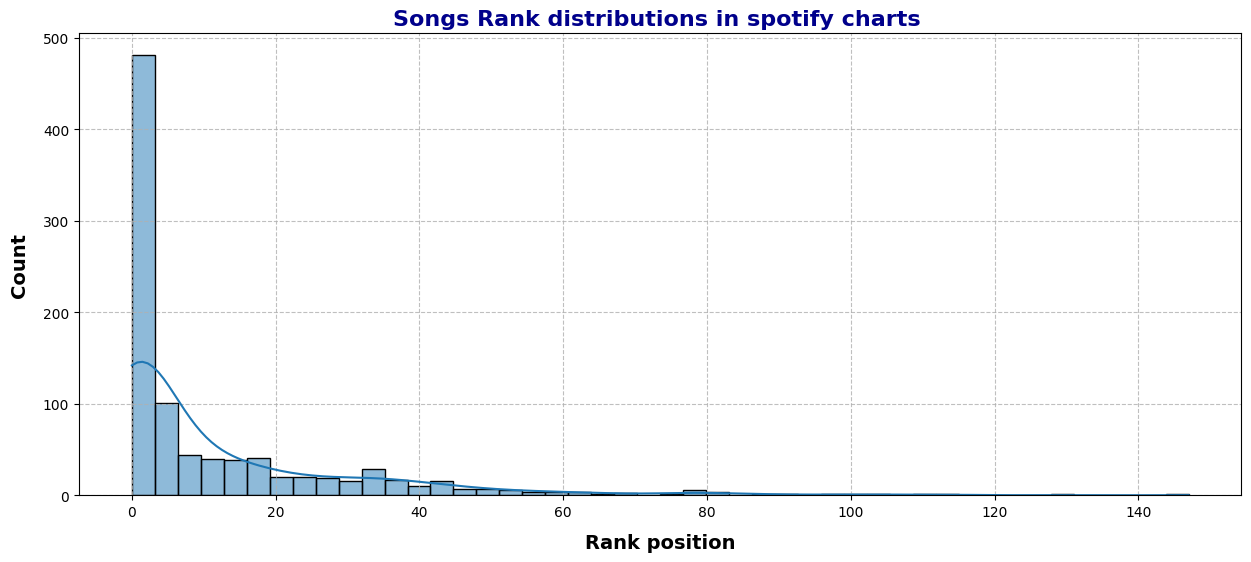

In [48]:
#Setting Gloabal Styles for the respective charts.

plt.rcParams['figure.figsize'] = [15, 6]
# Set title style
plt.rcParams['axes.titlesize'] = 16       # Title font size
plt.rcParams['axes.titleweight'] = 'bold' # Title font weight
plt.rcParams['axes.titlecolor'] = 'darkblue'  # Title color

# Set grid style
plt.rcParams['axes.grid'] = True          # Enable grid
plt.rcParams['grid.linestyle'] = '--'     # Grid line style (dashed)
plt.rcParams['grid.alpha'] = 0.8         # Grid transparency


# Set axis label styles
plt.rcParams['axes.labelsize'] = 14       # Axis label font size
plt.rcParams['axes.labelweight'] = 'bold' # Axis label weight
plt.rcParams['axes.labelpad'] = 10        # Padding between axis and label
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    sns.histplot(df['in_spotify_charts'], kde=True)
    plt.title('Songs Rank distributions in spotify charts ')
    plt.xlabel('Rank position')
    plt.show()



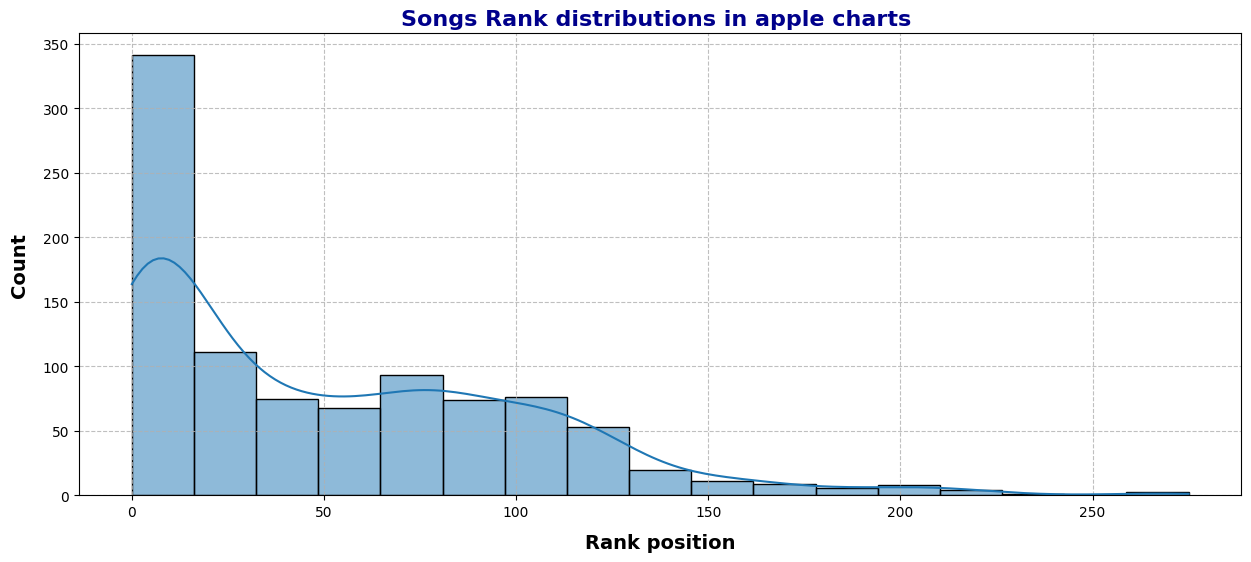

In [49]:
#Setting Gloabal Styles for the respective charts.

plt.rcParams['figure.figsize'] = [15, 6]
# Set title style
plt.rcParams['axes.titlesize'] = 16       # Title font size
plt.rcParams['axes.titleweight'] = 'bold' # Title font weight
plt.rcParams['axes.titlecolor'] = 'darkblue'  # Title color

# Set grid style
plt.rcParams['axes.grid'] = True          # Enable grid
plt.rcParams['grid.linestyle'] = '--'     # Grid line style (dashed)
plt.rcParams['grid.alpha'] = 0.8         # Grid transparency


# Set axis label styles
plt.rcParams['axes.labelsize'] = 14       # Axis label font size
plt.rcParams['axes.labelweight'] = 'bold' # Axis label weight
plt.rcParams['axes.labelpad'] = 10        # Padding between axis and label
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    sns.histplot(df['in_apple_charts'], kde=True)
    plt.title('Songs Rank distributions in apple charts ')
    plt.xlabel('Rank position')
    plt.show()